# Fourier series

This workbook explores the Fourier series representation of signals.  It is shown how symbolic methods can be used to calculate series coefficients, and the accuracy of the time-domain reconstruction for different numbers of coefficients is also considered.

## Background

Any signal $x(t)$ that is periodic with a period $T$ can be written in a Fourier series form
$$x(t) = \sum_{k=-\infty}^\infty c_k e^{j k \omega_0 t}$$
with $\omega_0 = 2\pi/T = \pi$ radians per second.  The coefficients satisfy
$$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j k \omega_0 t} dt.$$

For real signals with $x(t) = x^\ast(t)$ one can show that $c_{-k} = c_k^{\ast}$.  Writing in polar form $c_{k} = |c_{k}| e^{j \angle c_{k}}$ the series becomes
$$
x(t) = c_0 + \sum_{k=1}^\infty ( c_k e^{j k \omega_0 t} + c_{-k} e^{-j k \omega_0 t} )
= c_0 + \sum_{k=1}^\infty |c_{k}| ( e^{j k \omega_0 t} e^{j \angle c_{k}} + e^{-j k \omega_0 t} e^{-j \angle c_{k}})
= c_0 + \sum_{k=1}^\infty 2 |c_{k}| \cos(\omega_0 t + \angle c_{k})
$$

The coefficient $c_k$ corresponds to a complex exponential with frequency $k \omega_0$.  We call the component of the signal with frequency $k \omega_0$ the $k$th *harmonic*.  The first harmonic is also called the *fundamental*.

## Signal definition and analysis

The following periodic signal is considered throughout this workbook:  

![](figures/rectpulsetrain.png)

The signal is has period $T=8$, and $\omega_0 = 2 \pi/8 = \pi/4$.  We can find the corresponding Fourier series coefficients:
$$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j k \omega_0 t} dt
= \frac{1}{T} \int_{-2}^{2} e^{-j k \omega_0 t} dt 
= \frac{1}{j k \omega_0 T} [-e^{-j k \omega_0 t}]_{t=-2}^{2}
= \frac{2}{k \omega_0 T} \sin(2 k \omega_0).
$$
Additionally, the DC coefficient $c_0 = 4/8$.

## Fourier series reconstruction

For a given set of coefficients $c_k$ we want to be able to plot the corresponding $x(t)$.  The function defined in the cell below takes a set of Fourier series coefficients for a real signal `ckv` and a fundamental frequency `omega0`, and calculates reconstructed values `xv` at time instants `tv`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def fsrrec(ckv,omega0,tv):
    """Generate samples from real Fourier series representation
    ckv - 0 to N Fourier series coefficients
    omega0 - fundamental frequency
    tv - input time points  
    returns xv - output values
    """
    
    xv = ckv[0]*np.ones(tv.shape);
    for k in range(1,len(ckv)):
        xv = xv + 2*np.abs(ckv[k])*np.cos(k*omega0*tv + np.angle(ckv[k]));  # update with kth harmonic component
        
    return(np.real(xv));
# end def

In [2]:
def fsrrec_plots(ckv,omega0,tv):
    """The same as fssrec, but also outputs a plot of the individual harmonic components
    """
    
    xv = ckv[0]*np.ones(tv.shape); 
    #tv.shape returns the dimensions of the matrix (or, in this case, array) tv.
    #np.ones creates an array of the input size populated with 1's
    plt.figure(1)
    plt.plot(tv,xv)
    for k in range(1,len(ckv)):
        kh = 2*np.abs(ckv[k])*np.cos(k*omega0*tv + np.angle(ckv[k]));  #create kth harmonic
        plt.plot(tv,kh);
        
        xv = xv + kh; #add kth harmonic to x 
    plt.show()
    return(np.real(xv));
# end def

The cell below uses the derived expression for the coefficients of the signal and stores them in the vector `ckv`.  The $k$th element of `ckv` contains the coefficient $c_k$.

In [3]:
# Fourier series coefficients for rectangular pulse train
T = 8;  # period
N = 10;  # maximum number of terms
omega0 = 2*np.pi/T;
ckv = np.zeros(N+1, dtype=np.complex64);
#np.zeros is like np.ones but with 0's

for k in range(1,N+1):  ckv[k] = 2/(k*omega0*T)*np.sin(2*k*omega0);
ckv[0] = 4/8;

We can use the `fsrrec` function to find the time-domain representation of the signal $x(t)$ using a finite number of terms in the reconstruction.  The code below does this and plots the result.

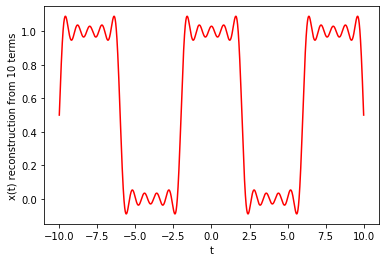

In [4]:
# Reconstruct from series representation and plot
tv = np.linspace(-10,10,10000);
xv = fsrrec(ckv,omega0,tv);
#xv = fsrrec_plots(ckv,omega0,tv);
plt.figure(2)
plt.plot(tv,xv,'r');
plt.xlabel('t');  plt.ylabel('x(t) reconstruction from ' + str(N) + ' terms');

## Finding the coefficients using symbolic math

This section will show how we can calculate the Fourier series coefficients of a signal using symbolic manipulation.  The first thing to do is symbolically define the signal.  The `Piecewise` function lets you define a signal over different pieces.

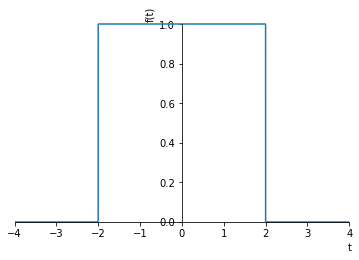

In [9]:
import sympy as sp
#sp.init_printing();  # pretty printing

t = sp.symbols('t')
x = sp.Piecewise( (0, t<=-2), (1, t<2), (0, True));
# sp.plot(x, (t,-4,4));  # worked in Python 2.8!
sp.plot(x.subs(t,sp.re(t)), (t,-4,4));  # plot (forcing t real)

#?sp.Piecewise() #uncomment if you want more information about this function

The following cell defines the symbolic integral for computing the coefficients.

In [6]:
Ts, k, w0 = sp.symbols('Ts k w0');
w0 = 2*sp.pi/Ts;
expt = sp.exp(-1j*k*w0*t);
cke = 1/Ts*sp.integrate(x*expt, (t, -Ts/2, Ts/2));
#cke = sp.integrate(x*expt, (t, -sp.oo, T/2)) - sp.integrate(x*expt, (t, -sp.oo, -T/2));  # alternative
ck = cke.subs(Ts,T).doit();  # set value for period and evaluate
ck

Piecewise((-4.0*I*exp(0.5*I*pi*k)/(pi*k) + 4.0*I*exp(-0.5*I*pi*k)/(pi*k), (k > -oo) & (k < oo) & Ne(k, 0)), (4, True))/8

We now define a vector `kv` of coefficients of interest, and populate corresponding elements of `ckv` with the coefficient values.

In [7]:
kv = np.arange(-10,11);  # coefficients to calculate
#by default, np.arange returns the integers between the given start and end points

ckvs = np.zeros(kv.shape, dtype=np.complex64);  # corresponding coefficient values
for i in range(len(kv)):
    ki = kv[i];  
    ckvs[i] = ck.subs({k:ki}).evalf();
ckvs

array([ 0.        +0.j,  0.03536776+0.j, -0.        +0.j, -0.04547284+0.j,
        0.        +0.j,  0.06366198+0.j, -0.        +0.j, -0.10610329+0.j,
        0.        +0.j,  0.31830987+0.j,  0.5       +0.j,  0.31830987+0.j,
        0.        +0.j, -0.10610329+0.j, -0.        +0.j,  0.06366198+0.j,
        0.        +0.j, -0.04547284+0.j, -0.        +0.j,  0.03536776+0.j,
        0.        +0.j], dtype=complex64)

Now we can plot the frequency-domain representation of the signal $x(t)$ by displaying the value of $c_k$ for each value $k$ of interest.  Since $c_k$ can in general be complex we need two plots:  one for magnitude and one for phase.

TypeError: stem() got an unexpected keyword argument 'c'

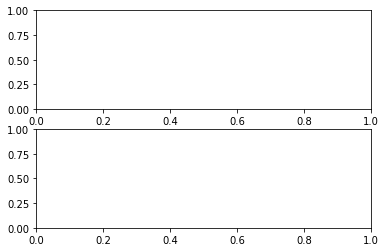

In [8]:
fh, ax = plt.subplots(2);
ax[0].stem(kv, np.abs(ckvs), c='g');  ax[0].set_ylabel(r'$|c_k|$');
ax[1].stem(kv, np.angle(ckvs), c='g');  ax[1].set_ylabel(r'$\angle c_k$');
plt.xlabel('$k$');

We could also have created a lambda function from the symbolic expression.  This function takes an array of values for $k$ and calculates $c_k$ directly.  Note though that at least on my version of Python `lam_ck(0)` generates a divide-by-zero error.

In [ ]:
lam_ck = sp.lambdify(k,ck,modules=['numpy']);
lam_ck(np.array((1,2,3)))

With numerical values for the coefficients, obtained via symbolic computation, we can plot the partial sum for the time-domain reconstruction as before.  Recall that our `fsrrec` function only takes the coefficients for nonnegative index values.

In [ ]:
kzi = np.where(kv==0)[0][0];  # index for zero element
ckvsp = ckvs[kzi:];
tv = np.linspace(-10,10,10000);
xv = fsrrec(ckvsp,2*np.pi/T,tv);

fh = plt.figure();
plt.plot(tv,xv,'r');
plt.xlabel('t');  plt.ylabel('x(t) reconstruction from ' + str(len(ckvsp)-1) + ' terms');

# Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  Find and plot the Fourier series frequency-domain representation for the signal $x_1(t)$ below over the range $k=-8, \ldots, 8$:
![](figures/rectpulsetrainshift.png)
Do this using both symbolic processing and by evaluating the integral for the coefficients by hand.  Compare the result with that displayed earlier for $x(t)$.  Note that the signals are related in time by $x_1(t) = x(t-2)$.
<br><br>
You should observe that shifting a signal only changes the phase in the frequency domain, while the magnitude remains unchanged.<br><br>

* Use symbolic processing to find and plot the frequency-domain representation of $x_2(t)$ below over the range $k=-8, \ldots, 8$:
![](figures/tripulsetrain.png)
Also plot the reconstruction over the range $t=-4$ to $t=4$ using only components up to and including the $5$th harmonic.
<br><br>
You should find that as $k$ increases the magnitude of the coefficients in this case falls off much faster than those of $x(t)$.  This is because $x_2(t)$ is smoother (it is at least continuous, while $x(t)$ is discontinuous).  The reconstruction is therefore also more accurate with a smaller number of terms.<br><br>

* Find and plot the frequency-domain representation of $x_3(t)$ below over the range $k=-8, \ldots, 8$.
![](figures/sawpulsetrain.png)